In [1]:
import pandas as pd

In [2]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
sns.set()

In [46]:
mapreduce_local = pd.read_csv('./benchmarks/mapreduce_local.csv', index_col=0)
mapreduce_cluster = pd.read_csv('./benchmarks/mapreduce_cluster.csv', index_col=0)
hive_local = pd.read_csv('./benchmarks/hive_local.csv', index_col=0)
hive_cluster = pd.read_csv('./benchmarks/hive_cluster.csv', index_col=0)
spark_local = pd.read_csv('./benchmarks/spark_local.csv', index_col=0)
spark_cluster = pd.read_csv('./benchmarks/spark_cluster.csv', index_col=0)

In [47]:
mapreduce_local.name = 'MapReduce Local'
mapreduce_cluster.name = 'MapReduce Cluster'
hive_local.name = 'Hive Local'
hive_cluster.name = 'Hive Cluster'
spark_local.name = 'Spark Local'
spark_cluster.name = 'Spark Cluster'

In [48]:
local_datasets = [mapreduce_local, hive_local, spark_local]
cluster_datasets = [mapreduce_cluster, hive_cluster, spark_cluster]
all_datasets = local_datasets + cluster_datasets
all_datasets

[     239.75  479.51  959.03  1909.97  3835.92
 job                                          
 1     0.948   1.679   2.915    5.488   10.654
 2     0.936   1.530   2.802    5.198   10.315
 3     1.316   2.165   2.976    4.641    7.829,
      239.75  479.51  959.03  1909.97  3835.92
 job                                          
 1     1.483   2.133   4.533    4.550      NaN
 2    10.266   9.750  10.100   10.683      NaN
 3    12.766  11.033  13.166    9.116      NaN,
      239.75  479.51  959.03  1909.97  3835.92
 job                                          
 1     1.443   2.355   4.691    9.149   18.967
 2     0.825   1.393   2.644    5.212    9.716
 3     0.462   0.959   2.232    4.204      NaN,
      239.75  479.51  959.03  1909.97  3835.92
 job                                          
 1     0.912   1.378   2.463    4.268    8.290
 2     0.707   1.040   1.736    2.454    4.851
 3     1.385   1.885   2.653    2.341    3.164,
      239.75  479.51  959.03  1909.97  3835.92
 job     

In [49]:
def extract_job_n_data(dataset, job_n, str_tech):
    sequential = pd.melt(dataset.iloc[[job_n-1]])
    sequential = sequential.apply(pd.to_numeric)
    sequential['tech'] = str_tech
    return sequential

In [50]:
def concatenate_single_job_data(sequential_datasets):
    return pd.concat([f_mr1_local, f_h1_local, f_s1_local])

In [40]:
for job_n in range(0,3):
    job_data = []
    for dataset in local_datasets:
        job_data.append(extract_job_n_data(dataset, job_n, dataset.name))
    job_data_concat = pd.concat(job_data)
    job_data_concat.to_csv('./benchmarks/job' + str(job_n+1) + '_local_data.csv')

In [41]:
for job_n in range(0,3):
    job_data = []
    for dataset in cluster_datasets:
        job_data.append(extract_job_n_data(dataset, job_n, dataset.name))
    job_data_concat = pd.concat(job_data)
    job_data_concat.to_csv('./benchmarks/job' + str(job_n+1) + '_cluster_data.csv')

In [51]:
for job_n in range(0,3):
    job_data = []
    for dataset in all_datasets:
        job_data.append(extract_job_n_data(dataset, job_n, dataset.name))
    job_data_concat = pd.concat(job_data)
    job_data_concat.to_csv('./benchmarks/job' + str(job_n+1) + '_all_data.csv')

In [10]:
mr_1 = pd.melt(mapreduce_local.iloc[[0]])
f_mr1_local = mr_1.apply(pd.to_numeric)
f_mr1_local['tech'] = 'Mapreduce'
f_mr1_local

,variable,value,tech
0,239.75,0.948,Mapreduce
1,479.51,1.679,Mapreduce
2,959.03,2.915,Mapreduce
3,1909.97,5.488,Mapreduce
4,3835.92,10.654,Mapreduce


In [11]:
h_1 = pd.melt(hive_local.iloc[[0]])
f_h1_local = h_1.apply(pd.to_numeric)
f_h1_local['tech'] = 'Hive'
f_h1_local

,variable,value,tech
0,239.75,1.483,Hive
1,479.51,2.133,Hive
2,959.03,4.533,Hive
3,1909.97,4.550,Hive
4,3835.92,NaN,Hive


In [12]:
s_1 = pd.melt(spark_local.iloc[[0]])
f_s1_local = s_1.apply(pd.to_numeric)
f_s1_local['tech'] = 'Spark'
f_s1_local

,variable,value,tech
0,239.75,1.443,Spark
1,479.51,2.355,Spark
2,959.03,4.691,Spark
3,1909.97,9.149,Spark
4,3835.92,18.967,Spark


In [13]:
job1_data = pd.concat([f_mr1_local, f_h1_local, f_s1_local])

In [66]:
job1_data = pd.read_csv('./benchmarks/job1_all_data.csv')
job2_data = pd.read_csv('./benchmarks/job2_all_data.csv')
job3_data = pd.read_csv('./benchmarks/job3_all_data.csv')

In [67]:
def plot_job_benchmark(job_data, job_n):
    plt.figure(figsize=(14,8))
    fig = sns.lineplot(x='variable', y='value', hue='tech', data=job_data, marker="o", linewidth = 2.5,
                      palette=["C0", "C1", "C2", "C0", "C1", "C2"], style='tech',
                      dashes=["", "", "", (2, 2), (2, 2), (2, 2)])
    plt.xlabel("Dataset Size (MB)")
    plt.ylabel("Time (Minutes)")
    plt.title("Job"+str(job_n)+" Execution Times")
    fig.legend(title='Tecnology')
    plt.show(fig)

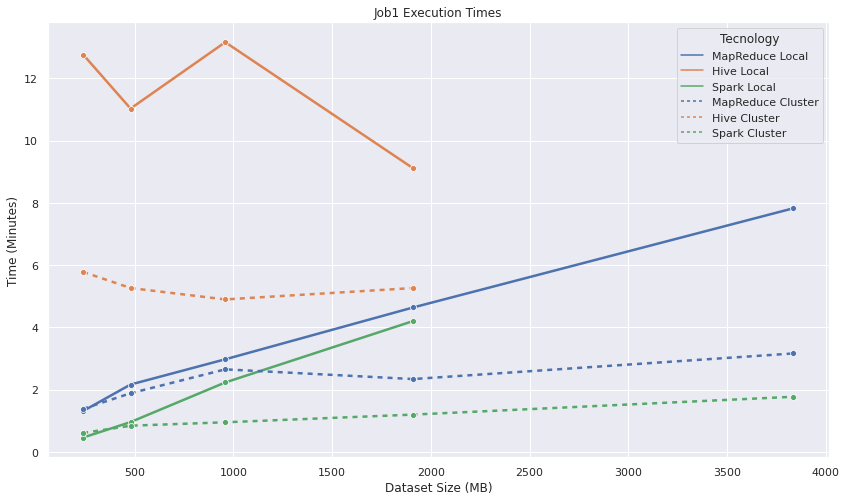

In [68]:
plot_job_benchmark(job1_data, 1)

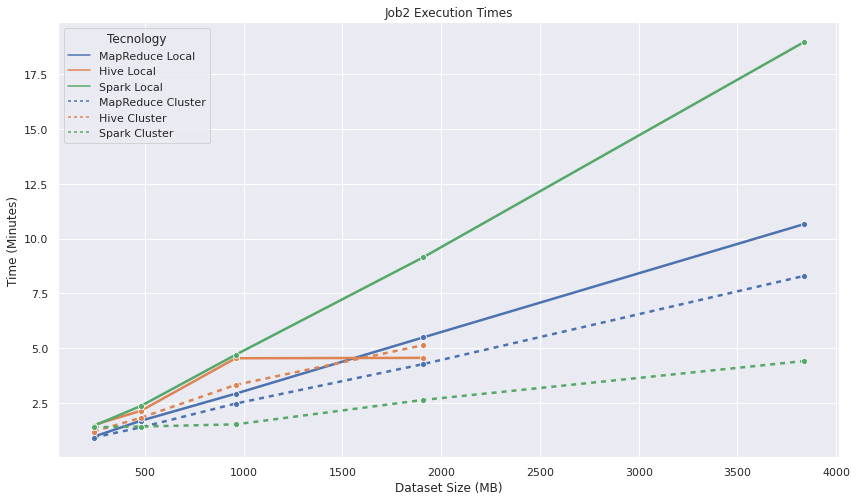

In [69]:
plot_job_benchmark(job2_data, 2)

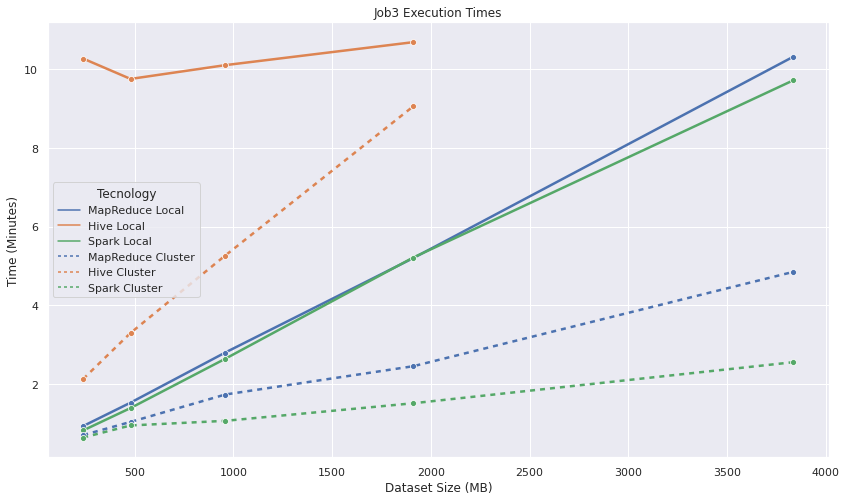

In [70]:
plot_job_benchmark(job3_data, 3)